In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing

In [3]:
from google.colab import files
uploaded = files.upload()

Saving test-c.csv to test-c.csv


In [5]:
df = pd.read_csv('test-c.csv')
df

,N,Rh,Rv,Rl,Rw,Rth
0,0.62,0.222222,0.6,0.5,0.3472,0.176797
1,0.62,0.222222,0.6,0.7,0.3472,0.146426
2,0.62,0.222222,0.6,0.9,0.3472,0.139309
3,0.62,0.222222,0.7,0.5,0.3472,0.179029
4,0.62,0.222222,0.7,0.7,0.3472,0.149079
...,...,...,...,...,...,...
188,0.72,0.500000,0.7,0.5,0.4032,0.140300
189,0.72,0.500000,0.7,0.7,0.4032,0.142883
190,0.72,0.500000,0.7,0.9,0.4032,0.143724
191,0.72,0.500000,0.8,0.5,0.4032,0.140070


In [6]:
x = pd.DataFrame (df, columns=['N','Rh','Rv','Rl','Rw'])
y = df['Rth'].values.reshape(-1,1)

In [7]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=ss.fit(x)

# Generating the standardized values of X and y
x=PredictorScalerFit.transform(x)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Quick sanity check with the shapes of Training and testing datasets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(154, 5)
(154, 1)
(39, 5)
(39, 1)


In [8]:
# Defining the model
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(5,), activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                66        
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 78 (312.00 Byte)
Trainable params: 78 (312.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='MSE', run_eagerly=True )

history = model.fit(x,y,batch_size=20 ,epochs=1000,shuffle=True, validation_data=(x_test, y_test))


Epoch 1/1000
10/10 [==============================] - 1s 52ms/step - loss: 1.1672 - val_loss: 1.1357
Epoch 2/1000
10/10 [==============================] - 0s 39ms/step - loss: 1.0002 - val_loss: 0.9805
Epoch 3/1000
10/10 [==============================] - 0s 41ms/step - loss: 0.8613 - val_loss: 0.8460
Epoch 4/1000
10/10 [==============================] - 0s 34ms/step - loss: 0.7382 - val_loss: 0.7301
Epoch 5/1000
10/10 [==============================] - 0s 25ms/step - loss: 0.6307 - val_loss: 0.6332
Epoch 6/1000
10/10 [==============================] - 0s 27ms/step - loss: 0.5413 - val_loss: 0.5507
Epoch 7/1000
10/10 [==============================] - 0s 27ms/step - loss: 0.4728 - val_loss: 0.4792
Epoch 8/1000
10/10 [==============================] - 0s 25ms/step - loss: 0.4091 - val_loss: 0.4209
Epoch 9/1000
10/10 [==============================] - 0s 29ms/step - loss: 0.3550 - val_loss: 0.3721
Epoch 10/1000
10/10 [==============================] - 0s 29ms/step - loss: 0.3110 - val_lo

In [10]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,1.167166,1.135729
1,1.000211,0.980547
2,0.861287,0.845981
3,0.738205,0.730064
4,0.630662,0.633179
...,...,...
995,0.000026,0.000015
996,0.000024,0.000012
997,0.000023,0.000013
998,0.000020,0.000014


<Axes: >

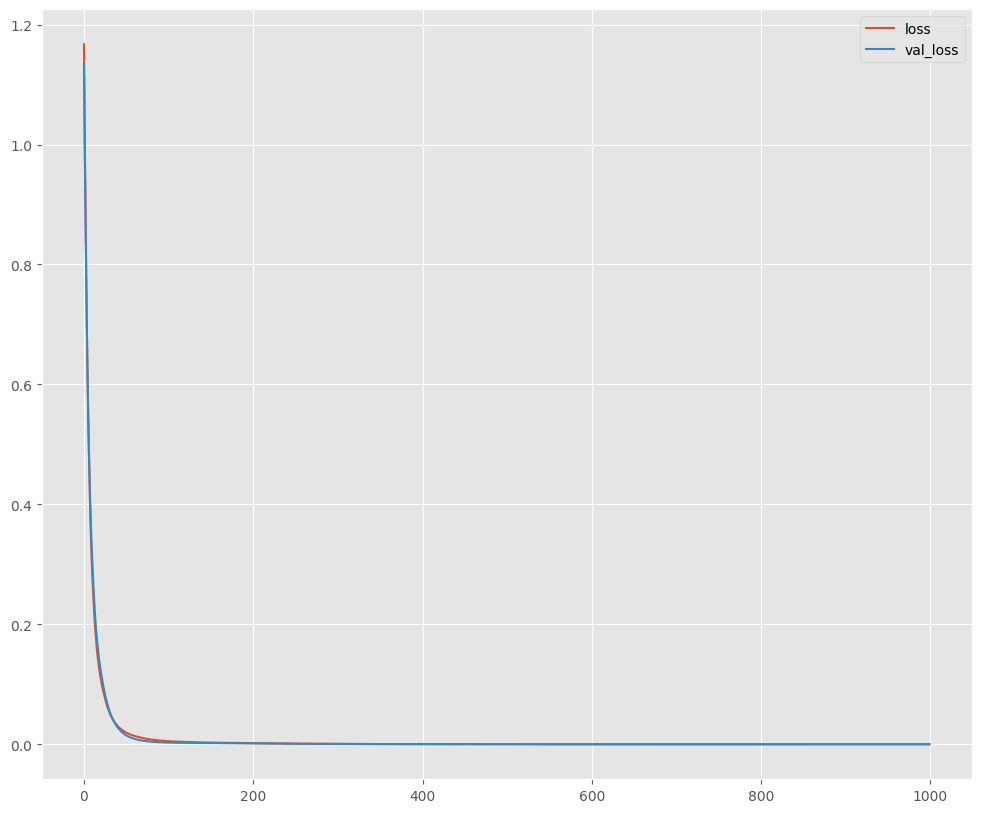

In [11]:
plt.style.use("ggplot")
pd.DataFrame(model.history.history).plot(figsize=(12,10))

In [13]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


In [14]:
# import lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean squared Error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score : ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error :  0.0025078640165280054
Mean squared Error :  1.104230188378706e-05
Root Mean squared Error :  0.0033229959199173056
R2 score :  0.8044165188278525
